<h1><center><strong>Projeto 2 - Titanic</strong></center></h1>

<h2>Introdução</h2>
    
<h6><p>Este projeto tem como objetivo propor pontos a serem investigados referentes as chances de sobrevivência dos passageiros do Titanic.</p>
    <p>Através da análise de dados iremos obter estatísticas relevantes a investigação proposta.</p>
    <p>Através da análise desenvolvida, tentaremos identificar se a taxa de sobrevivência dos passageiros foi influenciada por fatores como:</p>
    <ul>
        <li>Gênero;</li>
        <li>Classe Social;</li>
        <li>Idade.</li>
    </ul>
    <p>Para tanto, as perguntas a serem respondidas na análise são as seguintes:</p>
    <ul>
        <li><strong>As mulheres tiveram maior chance de sobrevivência do que os homens?</strong></li>
        <li><strong>Crianças tiveram uma taxa de sobrevivência maior que as demais faixas etárias?</strong></li>
        <li><strong>Os passageiros das primeiras classes tiveram maiores chances de sobrevivência do que os passageiros das segunda e terceira classes?</strong></li>
    </ul>
    Primeiro, vamos carregar o conjunto dos dados do site <a href="https://www.kaggle.com/c/titanic/data">Kaggle</a> e fazer uma verificação inicial, verificando como os dados estão estruturados:</h6>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
df_titanic = pd.read_csv('titanic_data.csv')

<h4><p>VARIÁVEIS:</p></h4>
<h6><p>Survived = Sobreviveu: 0 = Não, 1 = Sim</p>
<p>Pclass = Classe: Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º</p>
<p>Sex = Sexo: Sexo do passageiro</p>
<p>Age = Idade: Idade em anos</p>
<p>Sibsp = Quantidade de irmãos e/ou cônjuges a bordo do Titanic</p>
<p>Parch = Quantidade de pais e/ou crianças a bordo do Titanic</p>
<p>Ticket = Bilhete: Número do bilhete de embarque</p>
<p>Fare = Tarifa: Tarifa paga pelo Passageiro</p>
<p>Cabin = Cabine: Número de cabine</p>
<p>Embarked = Embarque: Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)</p>
<p>Notas:</p>
<p>Pclass = Classe: 1º = Superior 2º = Médio 3º = inferior</p>
    <p>Age = Idade: A idade informda é fracionada se for inferior a 1 ano. Se for uma idade estimada, esta será na forma de xx.5</p></br>
    Sibsp - definição das relações familiares a seguir:</br>
Sibling = Irmão, irmã, meio-irmão, irmandade</br>
Spouse = Cônjuge que é definido por marido ou esposa</br></br>
Parch - definição das relações familiares a seguir:</br>
Parent (Pais) = mãe, pai</br>
Child (Criança) = filha, filho, enteada, enteado</br>
Algumas crianças viajaram apenas com uma babá, portanto, parch = 0 para elas</h6>

In [3]:
# verificando os primeiros registros da planilha
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# verificando os últimos registros da planilha
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<h6>Vemos através dos últimos registro que a coluna que contém a idade (Age) dos passageiros apresenta informação "NaN" ao invés de trazer um valor. Isto significa que a coluna apresenta dados nulos.</h6>

In [5]:
# verificando o tipo de dado em cada coluna
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# verificando o tamanho total do dataset
df_titanic.shape

(891, 12)

In [7]:
# verificando o número de linhas em cada coluna
df_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<h6>Com base nas duas últimas verificações, identificamos que o dataset possui 891 linhas e 12 colunas, ou seja, contém a informação de 891 passageiros. Analisando o número de linhas em cada coluna, identificamos que na coluna "Age" há apenas 714 registros dos 891 passageiros, o que significa que 177 passageiros não possuem a informação de sua idade no registro. O mesmo ocorre nas colunas "Cabin" e "Embarked", mas para as nossas análises, estas duas últimas colunas não serão relevantes.</h6>

In [8]:
# eliminando as coluna irrelevantes para a análise
df_titanic_1 = df_titanic.drop(['Name','Ticket','Cabin','Fare','Embarked'], axis=1)
df_titanic_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [9]:
# renomeando as colunas restantes
df_titanic_1.columns = ['PassengerId', 'Sobreviveu', 'Classe', 'Sexo', 'Idade', 'SibSp',
              'Parch']
df_titanic_1.head()

,PassengerId,Sobreviveu,Classe,Sexo,Idade,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


<h6>Após eliminarmos as colunas irrelevantes e renomeá-las para melhor entendimento, vamos tratar agora dos valores nulos que encontramos na coluna de "Idade".</br>
Sabemos que não podemos simplesmente eliminar a coluna ou as linnhas que contém valores nulos, pois isso eliminará também outros dados relevantes para nossa análise. Nesse caso, podemos então substituir os valores faltantes por uma média de idade.</h6>

In [10]:
# verificando a idade média dos passageiros, arredondando o valor e exibindo o valor encontrado
idademedia = df_titanic_1['Idade'].mean()
idademedia = math.floor(idademedia)
print(idademedia)

29


<h6>A idade média encontrada foi 29 anos. Agora efetuaremos a substituição dos valores nulos por este.</h6>

In [11]:
# substituindo os valores
df_titanic_1.update(df_titanic_1['Idade'].fillna(idademedia))

# verificando a somatória dos valores nulos para conferência
df_titanic_1.isnull().sum()

PassengerId    0
Sobreviveu     0
Classe         0
Sexo           0
Idade          0
SibSp          0
Parch          0
dtype: int64

<h6>Após efetuarmos a limpeza do dataset e deixar os dados consistentes, podemos iniciar a análise.</h6></br>
<h6>Primeiramente, vamos identificar o percentual de pessoas que sobreviveram e que não sobreviveram.</h6>

Text(0,0.5,'')

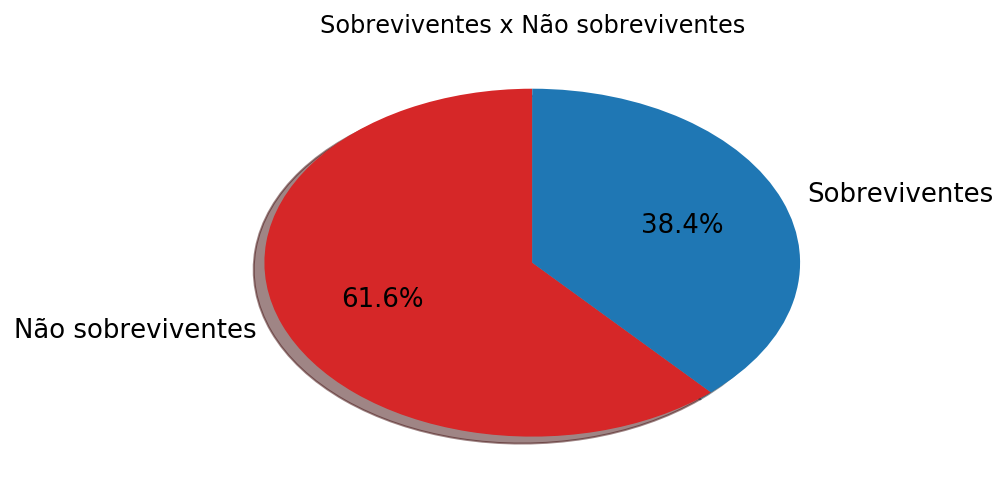

In [12]:
# gráfico para a representação da porcentagem de sobreviventes e não sobreviventes
df_titanic_1['Sobreviveu'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'), 
                                       title='Sobreviventes x Não sobreviventes', 
                                       fontsize=13, shadow=True, startangle=90, autopct='%1.1f%%', 
                                       labels=('Não sobreviventes','Sobreviventes'),
                                       figsize=(6,4)).set_ylabel('')

<h6>Do total de 891 passageiros contidos no dataset, observamos que mais da metade não sobreviveu. Esta porcentagem representa 549 passageiros aproximadamente.</h6></br>
<h6>A seguir vamos separar os passageiros por "Sexo" e verificar a contagem dos dados através do gráfico.</h6>

Homens: 
577
Mulheres: 
314


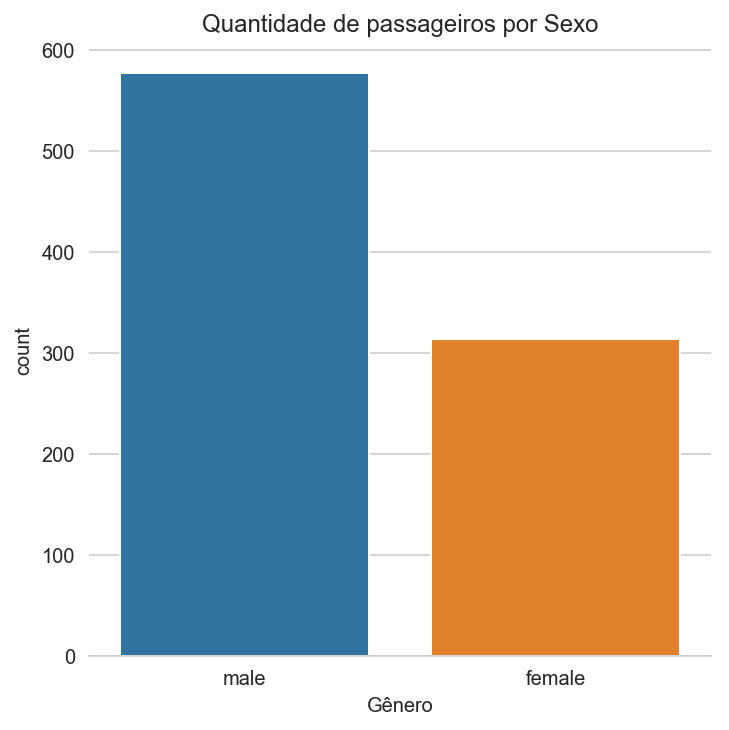

In [13]:
# verificação da quantidade dos passageiros
homemData = df_titanic_1[df_titanic_1.Sexo == "male"]
mulherData = df_titanic_1[df_titanic_1.Sexo == "female"]

print("Homens: ")
print(homemData.count()["Sexo"])

print("Mulheres: ")
print(mulherData.count()["Sexo"])

# gráfico para a representação da quantidade de acordo com o gênero
sns.set_style("whitegrid")
g = sns.catplot(x='Sexo', data = df_titanic_1, kind='count')
g.despine(left=True)
g.set_xlabels(u"Gênero")
plt.title(u"Quantidade de passageiros por Sexo")
plt.show()

<h6>A maioria dos passageiros do dataset eram homens.</h6></br>
<h6>Verificaremos então a influência do gênero sobre o fator sobrevivência.</h6></b>
<h6><strong>As mulheres tiveram maior chance de sobrevivência do que os homens?</strong></h6>

Text(0,0.5,'Quantidade')

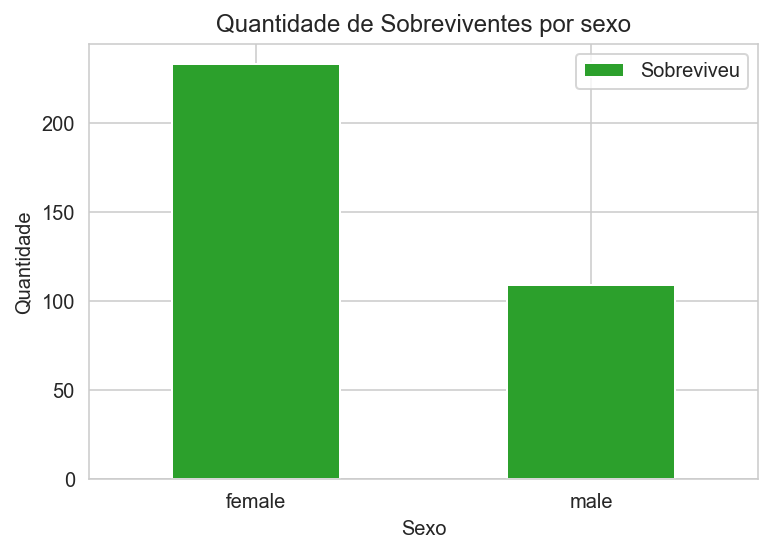

In [14]:
# gráfico que apresenta o número de sobreviventes de acordo com o gênero
df_titanic_1.pivot_table(index='Sexo',  values=('Sobreviveu'), aggfunc=np.sum)[['Sobreviveu']].plot(
    kind='bar', rot=0, label=('female','male'),
    color=('tab:green','tab:red'), stacked=True,
    title='Quantidade de Sobreviventes por sexo').set_xlabel('Sexo')
plt.ylabel('Quantidade')

<h6>Podemos observar através do gráfico que apesar do número de passageiros do sexo masculino superar o número do sexo feminino, o maior índice de sobrevivência foram de passageiros do sexo feminino. Portanto, as mulheres tiveram mais chance de sobrevivência do que os homens.</h6>

<h6>Agora identificaremos o fator "Classe" sobre o índice de sobrevivência.</h6>
<h6><strong>Os passageiros da primeira classe tiveram maiores chances de sobrevivência do que os passageiros das segunda e terceira classes?</strong></h6>

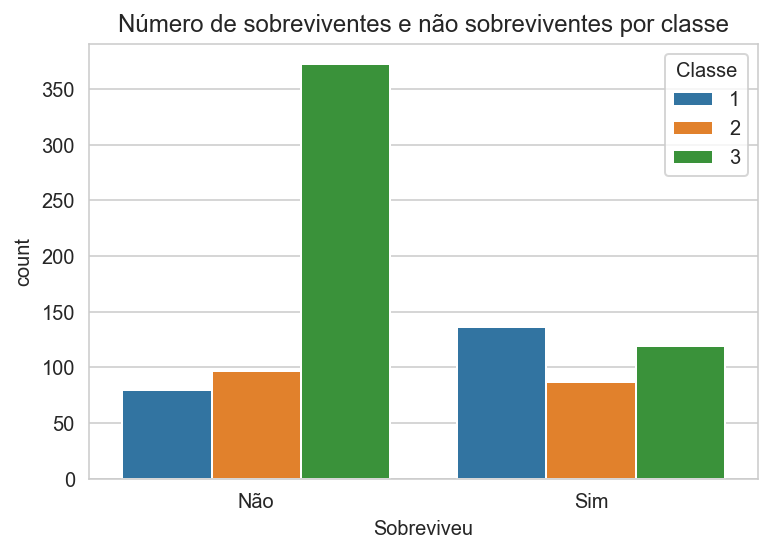

In [15]:
# gráfico para demonstração do número de sobreviventes e mortos por classe social
df_titanic_1['Sobreviveu'].replace({0:'Não', 1:'Sim'}, inplace=True)
sns.countplot(x='Sobreviveu', data=df_titanic_1, hue='Classe')
plt.title(u'Número de sobreviventes e não sobreviventes por classe')
plt.legend(title='Classe')
plt.show()

<h6>O gráfico acima nos mostra que a quantidade de "Não sobreviventes" da terceira classe é muito maior do que das primeira e segunda classes. Podemos observar ainda que o número de "Sobreviventes" da primeira classe é maior do que os sobreviventes das segunda e terceira. Constatamos então que mais passageiros da primeira classe conseguiram sobreviver. Por outro lado, os passageiros da terceira classe foram os que mais tiveram dificuldade em sobreviver.</h6>

<h6><p>Passaremos agora a verificar a influência do fator idade sobre a sobrevivência dos passageiros.</p></br>
<strong>Crianças tiveram uma taxa de sobrevivência maior que as demais faixas etárias?</strong>
</h6>

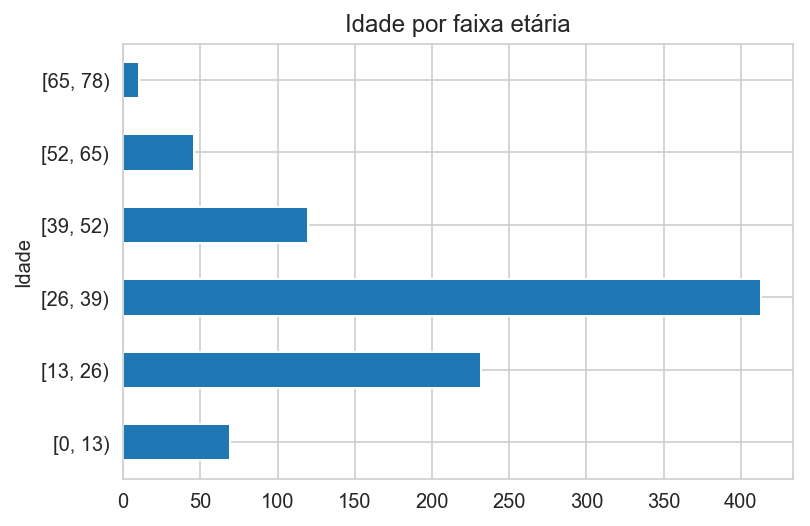

In [16]:
# Distribuição por idade (total de passageiros sobreviventes ou não)
df_titanic_1['Idade'] = pd.cut(df_titanic_1.Idade, range(0, 81, 13), right=False)
df_titanic_1.groupby(['Idade']).size().plot(kind='barh',stacked=True)
plt.title('Idade por faixa etária')
plt.show()

<h6>Observamos que a maioria dos passageiros (sobrevivenes e não sobreviventes) se encontram entre a faixa de 26 a 39 anos de idade.</h6>

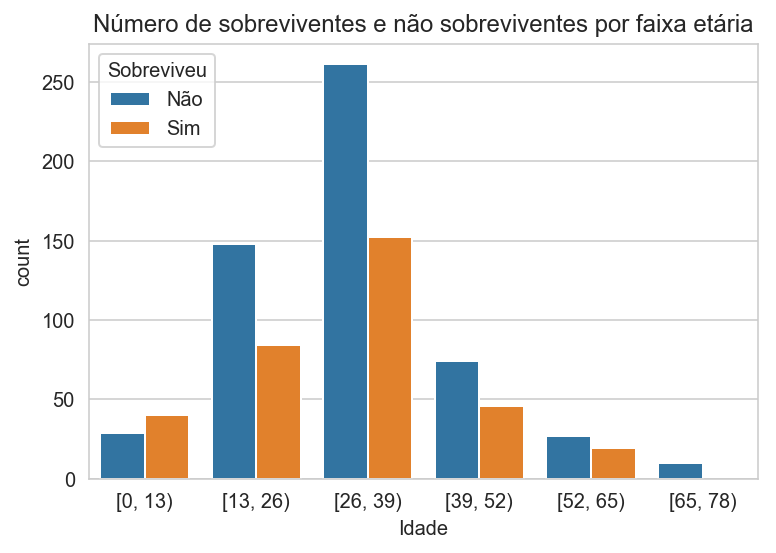

In [29]:
# gráfico para a demonstração de sobreviventes e não sobreviventes em cada faixa etária do gráfico anterior
df_titanic_1.groupby(['Idade']).size()
sns.countplot(x='Idade', data=df_titanic_1, hue='Sobreviveu')
plt.title(u'Número de sobreviventes e não sobreviventes por faixa etária')
plt.legend(title='Sobreviveu')
plt.show()

<h6> Com base no gráfico acima, verificamos que a faixa onde encontram-se as crianças de 0 a 13 anos é a única que apresenta o número de "Sobreviventes" (Sim) maior do que o de "Não sobreviventes" (Não). Portanto as crianças de 0 a 13 anos tiveram uma maior facilidade em sobreviver ao naufrágio do que passageiros nas demais faixas etárias.</h6>

<h2>Conclusão</h2>
<h6>Com base na análise de dados apresentada, concluiu-se os fatores como gênero, classe social e idade influenciaram diretamente nos índices de sobreviventes do Titanic. Os passageiros do sexo feminino, da primeira classe e na faixa etária de 0 a 13 anos foram os que obtiveram os maiores índices de sobrevivência ao naufrágio.</br></br>
Limitações da análise:</br></br>
O Titanic transportava um total de 1300 passageiros (além da tripulação a bordo). Na planilha analisada constavam apenas 891 registros, que representa 64,54% do valor total dos passageiros. Além disso, o fato de que muitos passageiros não tinham a idade registrada no nosso conjunto de dados, pode ter impactado nos resultados que envolviam essa variável de forma isolada ou combinada com outras variáveis. Em qualquer parte desta análise que envolvia, de algum modo, a variável idade foi utilizado uma cópia do dataframe original na qual foram substituídads as idads faltantes por uma média das idades.</h6>

<h6>Fontes:</h6>
<ul>
    <li>https://paulovasconcellos.com.br/como-criar-seu-primeiro-projeto-de-data-science-parte-2-de-2-cb9a2fe05eff</li>
    <li>https://medium.com/horadecodar/como-tratar-dados-nulos-no-dataset-4f0470b22d38</li>
    <li>https://stackoverflow.com/questions/34193862/pandas-pivot-table-list-of-aggfunc</li>
    <li>http://www.dadoscomsalelimao.com</li>
</ul>